# **8. Decision Trees**

Decision Tree is a classification method. Sometimes, it becomes difficult to classify the data without splitting it multiple times to identify the decision boundaries.

For example, assume we have a dataset that contains the target variable of whether or not an individual will earn more than AU$100k based on following features:

1. The Company they work for
2. The Job title
3. Their level of Education

We can split the data on any sequence of these features however the optimal split depends on metrics such as "Entropy" (randomness) and/or "Gini Impurity". The goal is to choose a split-sequence with Low Entropy and High Information Specificity.



## **1. Predicting Salary**

In [18]:
import pandas as pd
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

url = "https://raw.githubusercontent.com/codebasics/py/refs/heads/master/ML/9_decision_tree/salaries.csv"
df = pd.read_csv(url)
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [3]:
input = df.drop('salary_more_then_100k', axis='columns')
target = df['salary_more_then_100k']

In [8]:
# We now use LabelEncoder to encode the non-numeric values into numeric values
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

input['company_n'] = le_company.fit_transform(input['company'])
input['job_n'] = le_job.fit_transform(input['job'])
input['degree_n'] = le_degree.fit_transform(input['degree'])

In [9]:
# Drop the label columns
input_n = input.drop(['company', 'job', 'degree'], axis='columns')
input_n.head()

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [14]:
# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(input_n, target, test_size=0.2, random_state= 10)

In [15]:
# Train the classifier
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
# Check score
model.score(X_test, y_test)

0.75

## **2. Titanic Survival Classifiation**

We will use the following features to predict whether a person survived or not:

1. Pclass
2. Sex
3. Age
4. Fare

In [20]:
titanic_url = "https://raw.githubusercontent.com/codebasics/py/refs/heads/master/ML/9_decision_tree/Exercise/titanic.csv"
titanic = pd.read_csv(titanic_url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
titanic.Sex.value_counts()

,count
Sex,
male,577
female,314


In [24]:
# 1. Make an Inputs dataframe
Inputs = titanic[['Pclass', 'Sex', 'Age', 'Fare']]
Inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [25]:
# 2. Some data exploration, imputation and cleaning
Inputs.isnull().sum() # Need to impute the age; use median imputation

,0
Pclass,0
Sex,0
Age,177
Fare,0


In [28]:
# Median imputation for Age:
Inputs.Age = Inputs.Age.fillna(Inputs.Age.median())
Inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     891 non-null    float64
 3   Fare    891 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 28.0+ KB


<ipython-input-28-9d397fa21de0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Inputs.Age = Inputs.Age.fillna(Inputs.Age.median())


In [34]:
# 3. Encode the Sex column, Male = 1, Female = 0
le_sex = LabelEncoder()
Inputs['Sex_n'] = le_sex.fit_transform(Inputs['Sex'])
# Drop the sex column
Inputs = Inputs.drop('Sex', axis='columns')
Inputs.head()

,Pclass,Age,Fare,Sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [35]:
# 4. Create train-test split
X_train, X_test, y_train, y_test = train_test_split(Inputs, titanic.Survived, test_size=0.2, random_state= 10)

In [36]:
# 5. Fit the Decision tree model
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
# 6. Calculate model accuracy
model.score(X_test, y_test)

0.8268156424581006

In [52]:
# 7. Create a confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[102,  15],
       [ 16,  46]])

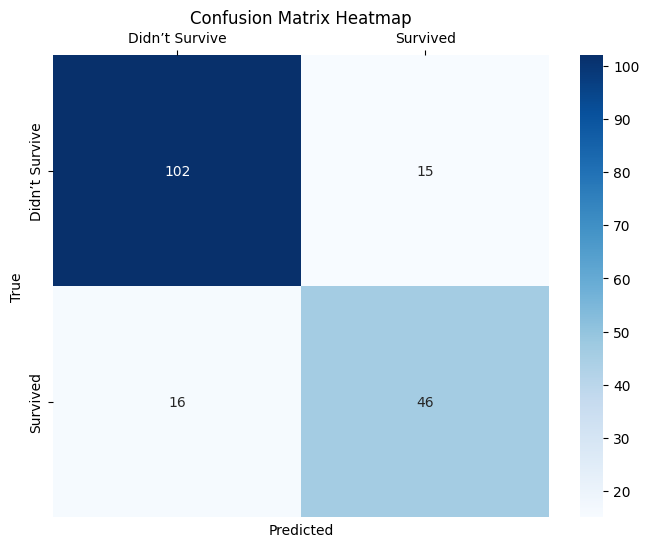

In [56]:
# Define labels for the survival status
labels = ['Didn’t Survive', 'Survived']

# Plot the Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

# Move x-axis labels to the top
plt.gca().xaxis.set_ticks_position('top')

# Label the axes and set the title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')

# Display the plot
plt.show()


**Summary**

1. True Negatives (TN): 102 (Correct predictions of people who didn’t survive)
2. False Positives (FP): 15 (Incorrect predictions of survival for those who 3.didn’t survive)
3. False Negatives (FN): 16 (Incorrect predictions of non-survival for those who survived)
4. True Positives (TP): 46 (Correct predictions of survival)